In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import train and test CSV files
train = pd.read_csv("C:\\Users\\arjun\\OneDrive - Northeastern University\\Pandas\\train.csv")
test = pd.read_csv("C:\\Users\\arjun\\OneDrive - Northeastern University\\Pandas\\test.csv")

#take a look at the training data
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Cacic, Mr. Luka",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
#get a list of the features within the dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
#see a sample of the dataset to get an idea of the variables
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C


In [5]:
#see a summary of the training dataset
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Cacic, Mr. Luka",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
#check for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


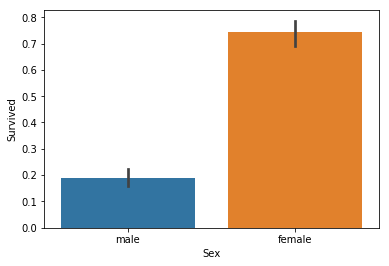

In [7]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males tha t survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


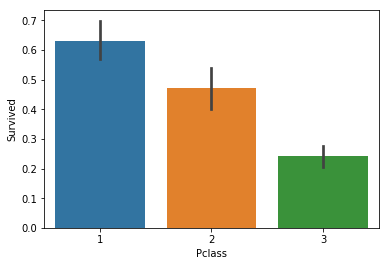

In [8]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


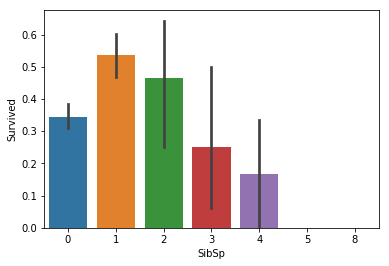

In [9]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)


print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

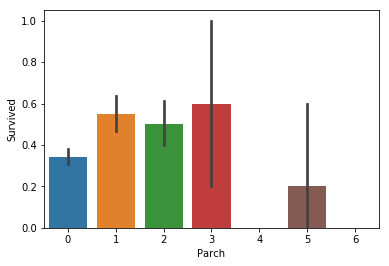

In [10]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

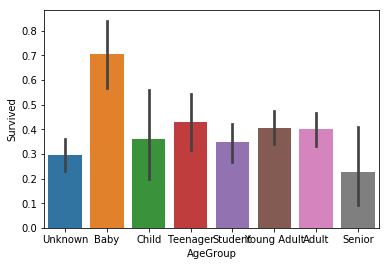

In [11]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


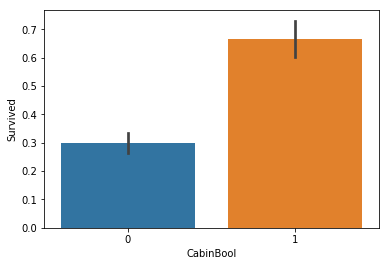

In [12]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

In [13]:
# Cleaning the data 
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Hiltunen, Miss. Marta",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [14]:
#drp useless data
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [15]:
#drop useless data
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [16]:
#fill missing values
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [17]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

In [18]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

NameError: name 'combine' is not defined